* Importing the Python libraries which are going to be used

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import iris_ml_models as models

* Loading the iris dataset and printing what is there inside

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

* Features of iris

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data.shape

(150, 4)

* Converting iris data into a pandas data frame to see it better

In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* Adding target data with their names into the data frame 

In [7]:
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Checking whether there are null values in our data

In [8]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

* Adding flower names into the data frame 

In [9]:
data['names'] = data.target.apply(lambda i : iris.target_names[i])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


* Seperate data according to the target names for visualization

In [10]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [11]:
data_setosa = data[data.target == 0]
data_versicolor = data[data.target == 1]
data_virginica = data[data.target == 2]

* Data Visualization

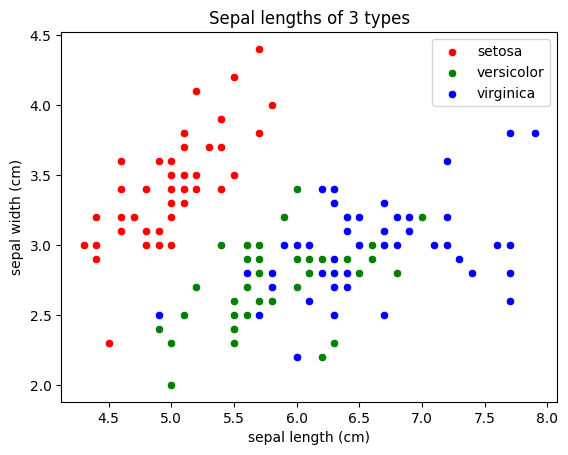

In [12]:
sns.scatterplot(data=data_setosa,x=data_setosa['sepal length (cm)'], y=data_setosa['sepal width (cm)'], c='red')
sns.scatterplot(data=data_versicolor, x=data_versicolor['sepal length (cm)'],y=data_versicolor['sepal width (cm)'], c='green')
sns.scatterplot(data=data_virginica, x=data_virginica['sepal length (cm)'], y=data_virginica['sepal width (cm)'], c='blue')
plt.title("Sepal lengths of 3 types")
plt.legend(['setosa', 'versicolor', 'virginica'])

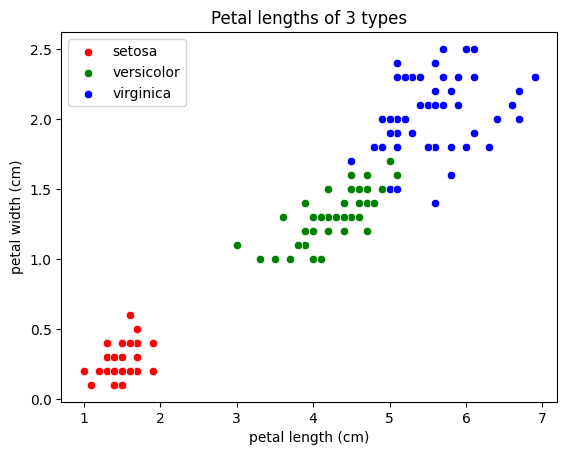

In [13]:
sns.scatterplot(data=data_setosa,x=data_setosa['petal length (cm)'], y=data_setosa['petal width (cm)'], c='red')
sns.scatterplot(data=data_versicolor, x=data_versicolor['petal length (cm)'],y=data_versicolor['petal width (cm)'], c='green')
sns.scatterplot(data=data_virginica, x=data_virginica['petal length (cm)'], y=data_virginica['petal width (cm)'], c='blue')
plt.title("Petal lengths of 3 types")
plt.legend(['setosa', 'versicolor', 'virginica'])

- Determining the input and target <br>
**Note:** Model creation and cross validation were done in iris_ml_models.py


In [14]:
x = data.drop(['target','names'], axis='columns')
y = data.target

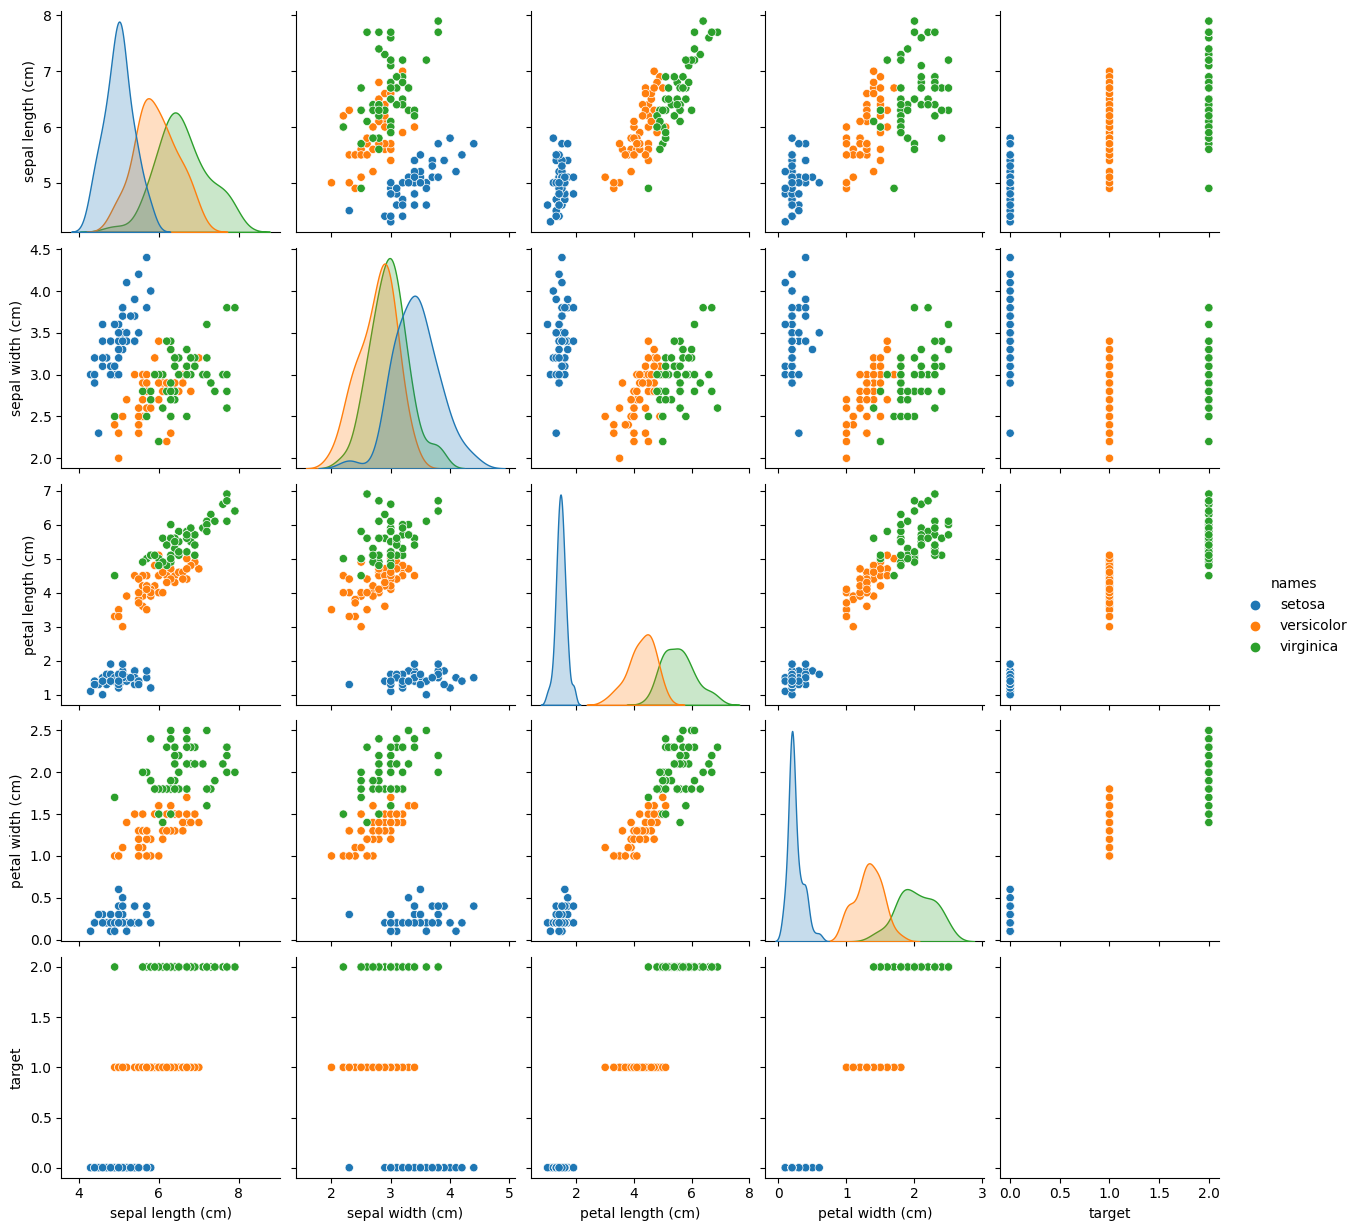

In [23]:
sns.pairplot(data=data, hue='names')

- Initialization of IrisModels class which have ML models for prediction

In [ ]:
model = models.IrisModels(x,y, 0.2,data)
mse_scores = []

- Linear Regression

Mean Squared Error of Linear Regression Model: 0.06563978404597784


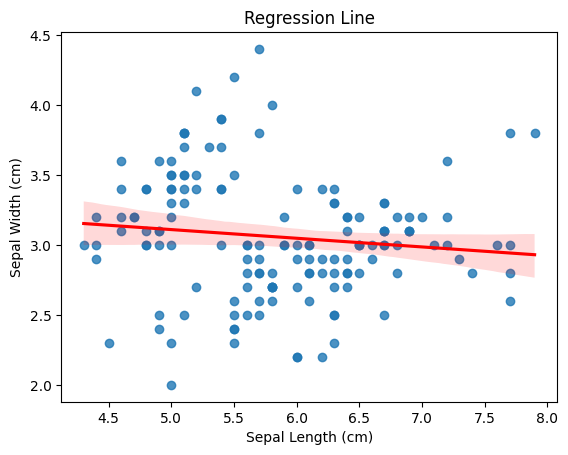

In [ ]:
linear_regression_mse=model.linear_regression(draw_reg_line=True)
mse_scores.append(linear_regression_mse)

- Decision Tree

Mean Squared Error of Decision Tree Model: 0.13333333333333333


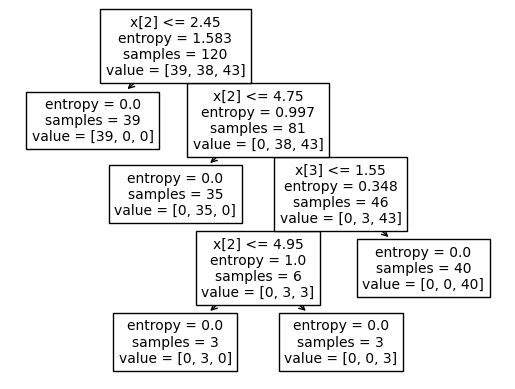

In [ ]:
decision_tree_mse=model.decision_tree(visualize=True)
mse_scores.append(decision_tree_mse)

- Logistic Regression

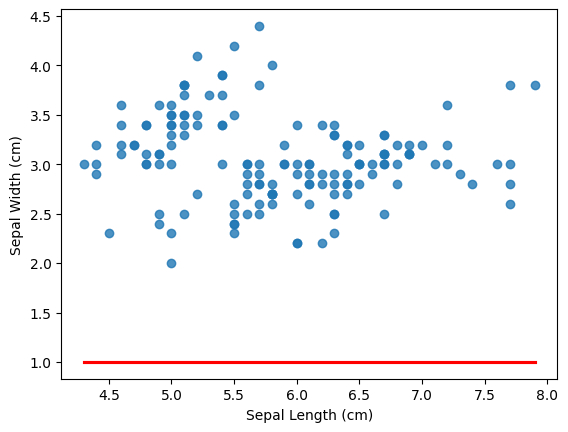

In [ ]:
logistic_regression_mse=model.logistic_regression(visualize=True)
mse_scores.append(logistic_regression_mse)

Logistic regression isn't an appropriate algorithm for this analysis

- Support Vector Machines (SVM)

In [ ]:
svm_mse = model.support_vector_machines(C=4)
mse_scores.append(svm_mse)

- Results of Mean Squared Errors (MSE)

In [ ]:
mses = pd.DataFrame([mse_scores], columns=('Lineer Regression', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine'))
mses

,Lineer Regression,Decision Tree,Logistic Regression,Support Vector Machine
0,0.06564,0.133333,0.133333,0.366667


MSE scores may be increased by changing the parameters.